In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"H:\My Drive\Intership Docs\CYBERSECURITY_PROJECT\CloudWatch_Traffic_Web_Attack.csv")
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [2]:
data.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [3]:
data.dtypes

bytes_in                int64
bytes_out               int64
creation_time          object
end_time               object
src_ip                 object
src_ip_country_code    object
protocol               object
response.code           int64
dst_port                int64
dst_ip                 object
rule_names             object
observation_name       object
source.meta            object
source.name            object
time                   object
detection_types        object
dtype: object

In [4]:
data.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.nunique()

bytes_in               260
bytes_out              239
creation_time           30
end_time                30
src_ip                  28
src_ip_country_code      7
protocol                 1
response.code            1
dst_port                 1
dst_ip                   1
rule_names               1
observation_name         1
source.meta              1
source.name              1
time                    30
detection_types          1
dtype: int64

In [9]:
data['creation_time'] = pd.to_datetime(data['creation_time'], errors='coerce')
data['end_time'] = pd.to_datetime(data['end_time'], errors='coerce')
data['time'] = pd.to_datetime(data['time'], errors='coerce')


In [10]:
data.dtypes

bytes_in                             int64
bytes_out                            int64
creation_time          datetime64[ns, UTC]
end_time               datetime64[ns, UTC]
src_ip                              object
src_ip_country_code                 object
protocol                            object
response.code                        int64
dst_port                             int64
dst_ip                              object
rule_names                          object
observation_name                    object
source.meta                         object
source.name                         object
time                   datetime64[ns, UTC]
detection_types                     object
dtype: object

In [11]:
Q1 = data['bytes_in'].quantile(0.25)
Q3 = data['bytes_in'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 values:", Q1)
print("Q3 values:", Q3)
print("IQR values:", IQR)

Q1 values: 5381.5
Q3 values: 30833.0
IQR values: 25451.5


In [12]:
lower_limit = Q1 - 1.5 * (IQR)
upper_limit = Q3 + 1.5 * (IQR)
print(lower_limit)
print(upper_limit)

-32795.75
69010.25


In [13]:
outliers = np.where((data['bytes_in'] > upper_limit) | (data['bytes_in'] < lower_limit))
outliers
outliers = ((data['bytes_in'] > upper_limit) | (data['bytes_in'] < lower_limit)).sum()
outliers

40

<Axes: ylabel='bytes_in'>

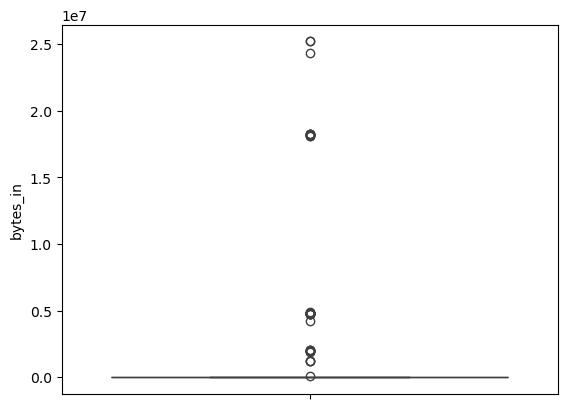

In [15]:
import seaborn as sns
sns.boxplot(data.bytes_in)

In [16]:
!pip install feature_engine

<Axes: ylabel='bytes_in'>

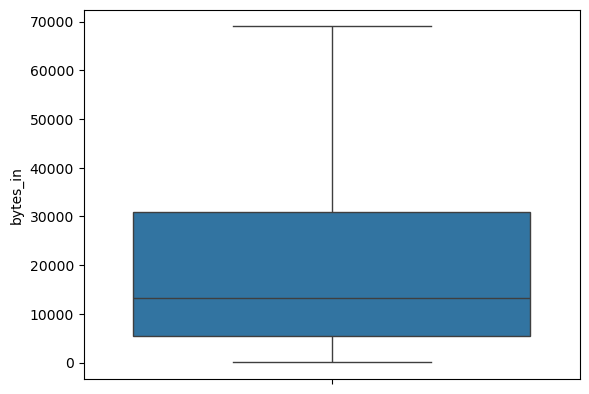

In [18]:
from feature_engine.outliers import Winsorizer
Winsorization = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = ['bytes_in'])
x = Winsorization.fit_transform(data[['bytes_in']])
sns.boxplot(x.bytes_in)

In [19]:
Q1 = data['bytes_out'].quantile(0.25)
Q3 = data['bytes_out'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 values:", Q1)
print("Q3 values:", Q3)
print("IQR values:", IQR)

Q1 values: 11142.0
Q3 values: 26279.5
IQR values: 15137.5


In [20]:
lower_limit = Q1 - 1.5 * (IQR)
upper_limit = Q3 + 1.5 * (IQR)
print(lower_limit)
print(upper_limit)

-11564.25
48985.75


In [21]:
outliers = np.where((data['bytes_out'] > upper_limit) | (data['bytes_out'] < lower_limit))
outliers
outliers = ((data['bytes_out'] > upper_limit) | (data['bytes_out'] < lower_limit)).sum()
outliers

37

<Axes: ylabel='bytes_out'>

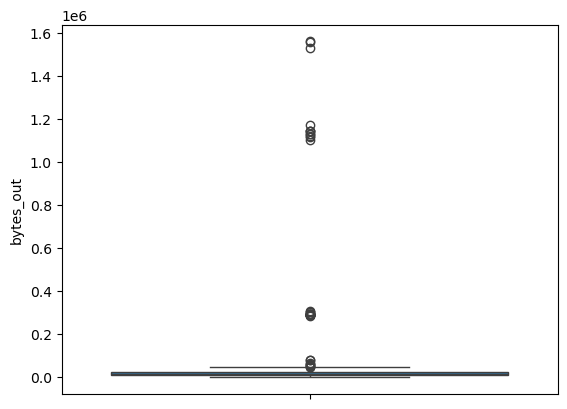

In [22]:
import seaborn as sns
sns.boxplot(data.bytes_out)

In [23]:
!pip install feature_engine

<Axes: ylabel='bytes_out'>

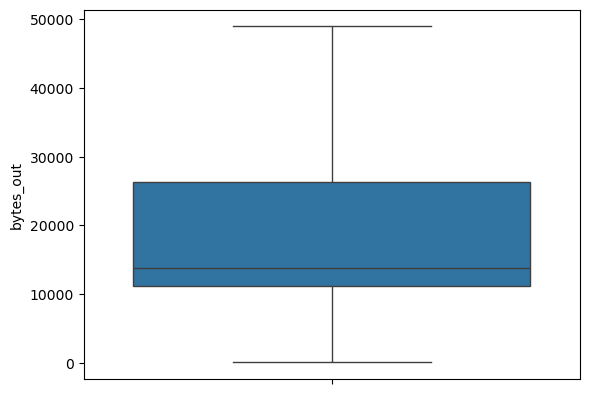

In [24]:
from feature_engine.outliers import Winsorizer
Winsorization = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = ['bytes_out'])
x = Winsorization.fit_transform(data[['bytes_out']])
sns.boxplot(x.bytes_out)

In [25]:
data.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


<Axes: >

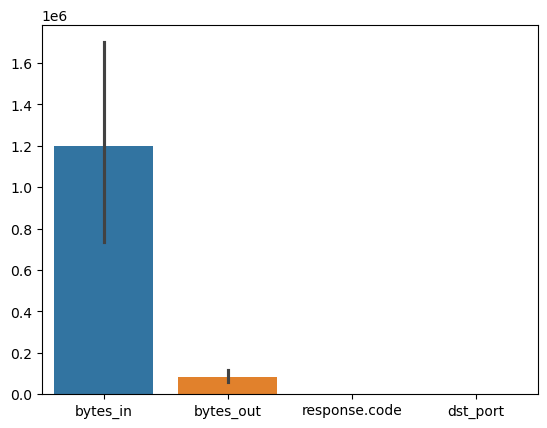

In [26]:
sns.barplot(data)

In [27]:
data.to_csv(r'H:\My Drive\Intership Docs\CYBERSECURITY_PROJECT\cleaned_data.csv', index=False)